Muhammad Obaidullah (24L-0509) 
Probability and Statistics Assignment 01 
Exploratory Data Analysis Over the Pelican Stores 

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from scipy import stats

In [12]:
# Using read_excel to load the Excel file into the dataframe. 
df = pd.read_excel('PelicanStores.xls', sheet_name='Data')

# Now these will work
print(df.info())
df.head()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer           100 non-null    int64  
 1   Type of Customer   100 non-null    object 
 2   Items              100 non-null    int64  
 3   Net Sales          100 non-null    float64
 4   Method of Payment  100 non-null    object 
 5   Gender             100 non-null    object 
 6   Marital Status     100 non-null    object 
 7   Age                100 non-null    int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 6.4+ KB
None


,Customer,Items,Net Sales,Age
count,100.000000,100.00000,100.000000,100.000000
mean,50.500000,3.22000,77.600500,43.080000
std,29.011492,2.73614,55.664938,12.389047
min,1.000000,1.00000,13.230000,20.000000
25%,25.750000,1.00000,39.600000,32.000000
50%,50.500000,2.00000,59.705000,42.000000
75%,75.250000,4.00000,100.900000,50.000000
max,100.000000,17.00000,287.590000,78.000000


In [14]:
# 3. Handling 'Net Sales' as a float (removing commas if there are any) 
if df['Net Sales'].dtype == object: 
    df['Net Sales'] = df['Net Sales'].str.replace(',', '').astype(float)

# 4. Defining the variable types 
# Quantitative: Net Sales, Items, Age 
# Qualitative: Type of Customer, Methods of Payment, Gender, Marital Status 




All the Descriptive Statistics for the Net Sales 



--- Global Descriptive Statistics ---

[Central Tendency]
Mean: 77.60
Median: 59.70
Mode: 31.60
5% Trimmed Mean: 71.54

[Dispersion]
Standard Deviation: 55.66
Variance: 3098.59
Range: 274.36
IQR: 61.30
Coefficient of Variation: 71.73

[Shape]
Skewness: 1.71
Kurtosis: 3.15

[Relative Location]
Min: 13.23
Max: 287.59
25th Percentile (Q1): 39.60
75th Percentile (Q3): 100.90

 -- Stats by Customer Type ---
                       mean  median        std    min     max  count
Type of Customer                                                    
Promotional       84.290000   63.42  61.462297  13.23  287.59     70
Regular           61.991667   51.00  35.067944  22.50  159.75     30

--- Frequency Distribution ---
  Sales Range  Frequency
0     (0, 50]         39
1   (50, 100]         35
2  (100, 150]         16
3  (150, 200]          6
4  (200, 250]          1
5  (250, 300]          3


C:\Users\obaid\AppData\Local\Temp\ipykernel_1076\2320081307.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Type of Customer', y = 'Net Sales', data=df, palette='Set2', legend=False)


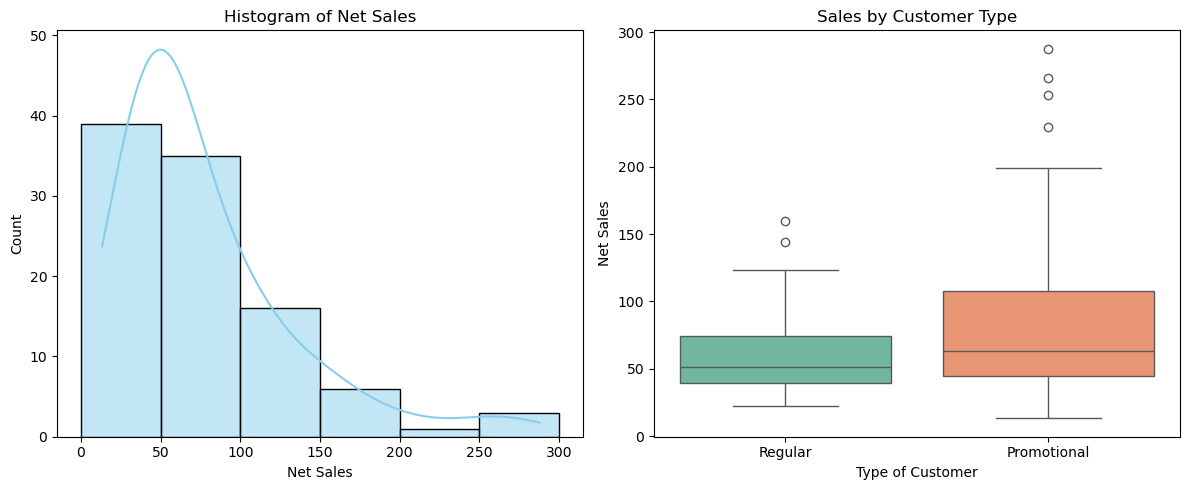

In [19]:
# There are 4 main categories of descriptive statistics 
stats_summary = { 
    "Central Tendency": { 
        "Mean": df['Net Sales'].mean(), 
        "Median": df['Net Sales'].median(), 
        "Mode": df['Net Sales'].mode(), 
        "5% Trimmed Mean": stats.trim_mean(df['Net Sales'], 0.05) 
    }, 
    "Dispersion": { 
        "Standard Deviation": df['Net Sales'].std(), 
        "Variance": df['Net Sales'].var(), 
        "Range": df['Net Sales'].max() - df['Net Sales'].min(), 
        "IQR": df['Net Sales'].quantile(0.75) - df['Net Sales'].quantile(0.25), 
        "Coefficient of Variation": (df['Net Sales'].std() / df['Net Sales'].mean()) * 100
    }, 
    "Shape": { 
        "Skewness": df['Net Sales'].skew(), 
        "Kurtosis": df['Net Sales'].kurt() # Kurtosis measures the "taildness" of a probability distribution, indicating the frequency of extreme outliers to a normal distribution 
    }, 
    "Relative Location": { 
        "Min": df['Net Sales'].min(), 
        "Max": df['Net Sales'].max(),
        "25th Percentile (Q1)": df['Net Sales'].quantile(0.25),
        "75th Percentile (Q3)": df['Net Sales'].quantile(0.75) 
    } 
} 

#Printing the summary for the statistical figures 
# Updated Printing Loop
print("--- Global Descriptive Statistics ---")
for category, measures in stats_summary.items():
    print(f"\n[{category}]")
    for name, value in measures.items():
        # Check if the value is a single number or a list (like Mode)
        if isinstance(value, (int, float, np.number)):
            print(f"{name}: {value:.2f}")
        else:
            # For Mode, we just print the first value in the list
            print(f"{name}: {value[0]:.2f}")

# STATISTICS BY customer type 
cust_stats = df.groupby('Type of Customer')['Net Sales'].agg(['mean', 'median', 'std', 'min', 'max', 'count']) 
print("\n -- Stats by Customer Type ---")
print(cust_stats) 

# Frequency Distribution 
bins = [0,50, 100, 150, 200, 250, 300] 
df['Sales_Range'] = pd.cut(df['Net Sales'], bins = bins) 
freq_table = df['Sales_Range'].value_counts().sort_index().reset_index() 
freq_table.columns = ['Sales Range', 'Frequency'] 
print("\n--- Frequency Distribution ---")
print(freq_table) 

#Visualization 
plt.figure(figsize=(12,5))

#Graph 1: Histogram 
plt.subplot(1,2,1) 
sns.histplot(df['Net Sales'], bins=bins, kde=True, color='skyblue') 
plt.title('Histogram of Net Sales')

#Graph 2: Box Plot 
plt.subplot(1,2,2) 
sns.boxplot(x='Type of Customer', y = 'Net Sales', data=df, palette='Set2', legend=False)
plt.title('Sales by Customer Type') 

plt.tight_layout()
plt.show() 




Question 2 - Descriptive Statistics concerning the relationship between age and net sales 

In [20]:
# 1. Setup Groups 
age_bins = [10,30,50,70,100] 
age_labels = ['10-30', '31-50', '51-70', '70+'] 
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels) 


In [21]:
# 2. Calculating the exhaustive Comparative Statistics 
# We include CV (Coefficient of Variation) to check relative risk/spread 

def cv(x): return  (x.std() / x.mean()) * 100 if x.mean() !=0 else 0 

bivariate_master_table = df.groupby('Age_Group', observed=False)['Net Sales'].agg( 
    ['count', 'mean', 'median', 'std', 'min', 'max', cv, stats.skew]
).rename(columns={'cv': 'Coeff_of_Var %', 'skew': 'Skewness'}) 

print("--- Master Bivariate Table: Age vs Net Sales ---") 
print(bivariate_master_table) 



--- Master Bivariate Table: Age vs Net Sales ---
           count       mean  median        std    min     max  Coeff_of_Var %  \
Age_Group                                                                       
10-30         18  95.078333   71.50  63.432182  31.60  253.00       66.715707   
31-50         58  72.507759   57.06  52.171501  13.23  266.00       71.952991   
51-70         21  75.248571   62.40  58.271561  18.00  287.59       77.438761   
70+            3  87.656667   58.00  62.760805  45.22  159.75       71.598439   

           Skewness  
Age_Group            
10-30      1.376178  
31-50      1.558538  
51-70      2.343985  
70+        0.674264  


In [23]:
# 3. Calculating the relationship metrics 
r = df['Age'].corr(df['Net Sales'])
r_sq = r**2 
cov_val = df['Age'].cov(df['Net Sales']) 

print(f"\n--- Numerical Relationship Metrics ---") 
print(f"Pearson Correlation (r): {r:.4f}") 
print(f"Coefficent of Determination (R^2): {r_sq: .4f}") 
print(f"Covariance: {cov_val:.4f}") 



--- Numerical Relationship Metrics ---
Pearson Correlation (r): -0.0106
Coefficent of Determination (R^2):  0.0001
Covariance: -7.3349


C:\Users\obaid\AppData\Local\Temp\ipykernel_1076\3518333472.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Age_Group', y = 'Net Sales', data = df, palette= 'light:b', inner="quart")


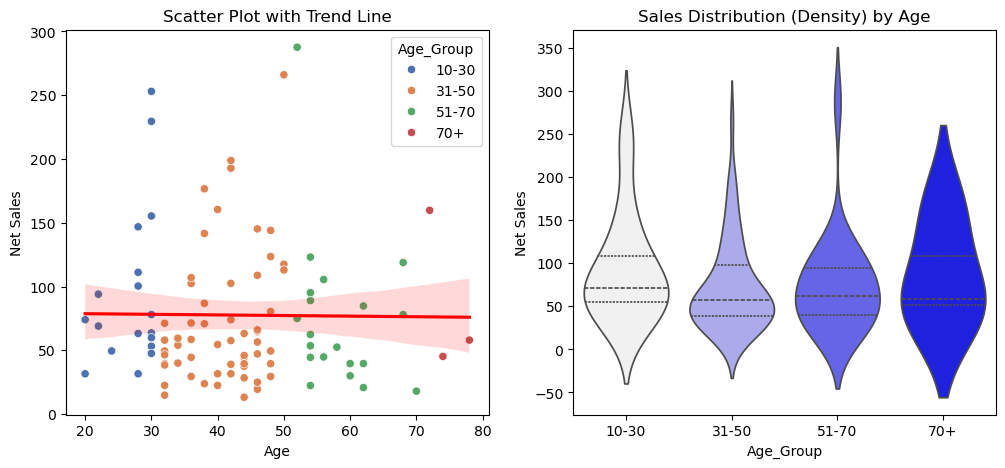

In [24]:
# 4. Final Visualization 
plt.figure(figsize=(12,5)) 
plt.subplot(1,2,1) 
sns.scatterplot(x='Age', y = 'Net Sales', data=df, hue='Age_Group', palette='deep') 
sns.regplot(x='Age', y = 'Net Sales', data=df, scatter=False, color='red') 
plt.title('Scatter Plot with Trend Line') 

plt.subplot(1,2,2) 
sns.violinplot(x='Age_Group', y = 'Net Sales', data = df, palette= 'light:b', inner="quart") 
plt.title('Sales Distribution (Density) by Age') 
plt.show() 